In [1]:
"""
Created on : August 2022
Author : Jhanvi Zala
"""

'\nCreated on : August 2022\nAuthor : Jhanvi Zala\n'

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd 
import keras
from keras.applications.resnet import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, regularizers
from keras.layers import Input, Dense, Flatten, Dropout
from keras.models import Model, load_model

from keras.regularizers import l2, l1_l2
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os



In [2]:
img_height=255
img_width=255
batch_size=32
new_ds_path = './leaves_dataset/new_leave_dataset'

In [3]:
train_folder = os.path.join(new_ds_path,'output','train')
valid_folder = os.path.join(new_ds_path,'output','val')

train_datagen = ImageDataGenerator(
    rescale=1./255) 

train_ds = train_datagen.flow_from_directory(
    train_folder,
    color_mode="rgb",
    batch_size=batch_size,
    target_size=(img_height, img_width),
    class_mode='categorical',
    seed = 42,
    shuffle=True)

valid_ds = train_datagen.flow_from_directory(
    valid_folder,
    color_mode="rgb",    
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    seed = 42,
    shuffle=True)

Found 3114 images belonging to 32 classes.
Found 792 images belonging to 32 classes.


In [4]:
class_list=list(train_ds.class_indices.keys())

In [5]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break
    

(32, 255, 255, 3)
(32, 32)


In [6]:
image_size = image_batch.shape[1]
no_of_channel =image_batch.shape[3]
input_shape = (image_size, image_size, no_of_channel)
num_labels = 32


In [7]:
from keras.models import Sequential

resnet_model = Sequential()

pretrained = ResNet50(include_top=False,
                input_shape=input_shape,
                pooling='avg',
                classes=num_labels,
                weights='imagenet')

for layer in pretrained.layers:
    layer.trainable = False
    
resnet_model.add(pretrained)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dense(num_labels, activation='softmax',))

resnet_model.summary()


2022-09-17 23:05:36.865498: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 32)                8224      
                                                                 
Total params: 24,776,352
Trainable params: 1,188,640
Non-trainable params: 23,587,712
_________________________________________________________________


In [8]:
resnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy',tf.keras.metrics.TruePositives(),tf.keras.metrics.FalsePositives(),
                        tf.keras.metrics.FalseNegatives(),tf.keras.metrics.TrueNegatives()])

filepath = 'leafclassification.h5'
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, baseline=0.01)
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             save_weights_only=True,
                             verbose=1,
                             mode='min', 
                             save_best_only=True)

history = resnet_model.fit(train_ds, validation_data=valid_ds, epochs=150,callbacks=[checkpoint])


Epoch 1/150
 1/98 [..............................] - ETA: 6:33 - loss: 3.5392 - accuracy: 0.0000e+00 - true_positives: 0.0000e+00 - false_positives: 0.0000e+00 - false_negatives: 10.0000 - true_negatives: 310.0000

2022-09-17 23:05:43.437985: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 134217728 exceeds 10% of free system memory.
2022-09-17 23:05:43.581990: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 134217728 exceeds 10% of free system memory.
2022-09-17 23:05:43.651696: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 138444800 exceeds 10% of free system memory.
2022-09-17 23:05:43.725882: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 134217728 exceeds 10% of free system memory.
2022-09-17 23:05:43.812728: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 134217728 exceeds 10% of free system memory.


98/98 [==============================] - ETA: 0s - loss: 3.3872 - accuracy: 0.0629 - true_positives: 1.0000 - false_positives: 0.0000e+00 - false_negatives: 3113.0000 - true_negatives: 96534.0000
Epoch 00001: val_loss improved from inf to 3.22084, saving model to leafclassification.h5
98/98 [==============================] - 452s 5s/step - loss: 3.3872 - accuracy: 0.0629 - true_positives: 1.0000 - false_positives: 0.0000e+00 - false_negatives: 3113.0000 - true_negatives: 96534.0000 - val_loss: 3.2208 - val_accuracy: 0.1162 - val_true_positives: 2.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 790.0000 - val_true_negatives: 24552.0000
Epoch 2/150
98/98 [==============================] - ETA: 0s - loss: 3.0071 - accuracy: 0.1278 - true_positives: 30.0000 - false_positives: 5.0000 - false_negatives: 3084.0000 - true_negatives: 96529.0000
Epoch 00002: val_loss improved from 3.22084 to 2.94591, saving model to leafclassification.h5
98/98 [==============================] - 449

Epoch 14/150
98/98 [==============================] - ETA: 0s - loss: 1.4796 - accuracy: 0.5321 - true_positives: 1027.0000 - false_positives: 250.0000 - false_negatives: 2087.0000 - true_negatives: 96284.0000
Epoch 00014: val_loss improved from 1.68692 to 1.68230, saving model to leafclassification.h5
98/98 [==============================] - 444s 5s/step - loss: 1.4796 - accuracy: 0.5321 - true_positives: 1027.0000 - false_positives: 250.0000 - false_negatives: 2087.0000 - true_negatives: 96284.0000 - val_loss: 1.6823 - val_accuracy: 0.4533 - val_true_positives: 217.0000 - val_false_positives: 75.0000 - val_false_negatives: 575.0000 - val_true_negatives: 24477.0000
Epoch 15/150
98/98 [==============================] - ETA: 0s - loss: 1.4153 - accuracy: 0.5495 - true_positives: 1110.0000 - false_positives: 229.0000 - false_negatives: 2004.0000 - true_negatives: 96305.0000
Epoch 00015: val_loss did not improve from 1.68230
98/98 [==============================] - 446s 5s/step - loss: 1.

Epoch 27/150
98/98 [==============================] - ETA: 0s - loss: 1.1443 - accuracy: 0.6285 - true_positives: 1455.0000 - false_positives: 269.0000 - false_negatives: 1659.0000 - true_negatives: 96265.0000
Epoch 00027: val_loss improved from 1.37484 to 1.33514, saving model to leafclassification.h5
98/98 [==============================] - 444s 5s/step - loss: 1.1443 - accuracy: 0.6285 - true_positives: 1455.0000 - false_positives: 269.0000 - false_negatives: 1659.0000 - true_negatives: 96265.0000 - val_loss: 1.3351 - val_accuracy: 0.5480 - val_true_positives: 314.0000 - val_false_positives: 90.0000 - val_false_negatives: 478.0000 - val_true_negatives: 24462.0000
Epoch 28/150
98/98 [==============================] - ETA: 0s - loss: 1.0920 - accuracy: 0.6532 - true_positives: 1540.0000 - false_positives: 273.0000 - false_negatives: 1574.0000 - true_negatives: 96261.0000
Epoch 00028: val_loss did not improve from 1.33514
98/98 [==============================] - 446s 5s/step - loss: 1.

Epoch 40/150
98/98 [==============================] - ETA: 0s - loss: 0.8880 - accuracy: 0.7091 - true_positives: 1837.0000 - false_positives: 285.0000 - false_negatives: 1277.0000 - true_negatives: 96249.0000
Epoch 00040: val_loss did not improve from 1.15832
98/98 [==============================] - 445s 5s/step - loss: 0.8880 - accuracy: 0.7091 - true_positives: 1837.0000 - false_positives: 285.0000 - false_negatives: 1277.0000 - true_negatives: 96249.0000 - val_loss: 1.2040 - val_accuracy: 0.5960 - val_true_positives: 375.0000 - val_false_positives: 112.0000 - val_false_negatives: 417.0000 - val_true_negatives: 24440.0000
Epoch 41/150
98/98 [==============================] - ETA: 0s - loss: 0.9262 - accuracy: 0.7068 - true_positives: 1822.0000 - false_positives: 324.0000 - false_negatives: 1292.0000 - true_negatives: 96210.0000
Epoch 00041: val_loss did not improve from 1.15832
98/98 [==============================] - 444s 5s/step - loss: 0.9262 - accuracy: 0.7068 - true_positives: 

Epoch 53/150
98/98 [==============================] - ETA: 0s - loss: 0.8033 - accuracy: 0.7370 - true_positives: 1973.0000 - false_positives: 336.0000 - false_negatives: 1141.0000 - true_negatives: 96198.0000
Epoch 00053: val_loss did not improve from 1.07343
98/98 [==============================] - 444s 5s/step - loss: 0.8033 - accuracy: 0.7370 - true_positives: 1973.0000 - false_positives: 336.0000 - false_negatives: 1141.0000 - true_negatives: 96198.0000 - val_loss: 1.1157 - val_accuracy: 0.6477 - val_true_positives: 419.0000 - val_false_positives: 117.0000 - val_false_negatives: 373.0000 - val_true_negatives: 24435.0000
Epoch 54/150
98/98 [==============================] - ETA: 0s - loss: 0.7899 - accuracy: 0.7495 - true_positives: 1998.0000 - false_positives: 322.0000 - false_negatives: 1116.0000 - true_negatives: 96212.0000
Epoch 00054: val_loss did not improve from 1.07343
98/98 [==============================] - 442s 5s/step - loss: 0.7899 - accuracy: 0.7495 - true_positives: 

Epoch 66/150
98/98 [==============================] - ETA: 0s - loss: 0.6781 - accuracy: 0.7803 - true_positives: 2185.0000 - false_positives: 320.0000 - false_negatives: 929.0000 - true_negatives: 96214.0000
Epoch 00066: val_loss did not improve from 1.01426
98/98 [==============================] - 443s 5s/step - loss: 0.6781 - accuracy: 0.7803 - true_positives: 2185.0000 - false_positives: 320.0000 - false_negatives: 929.0000 - true_negatives: 96214.0000 - val_loss: 1.1463 - val_accuracy: 0.6263 - val_true_positives: 438.0000 - val_false_positives: 149.0000 - val_false_negatives: 354.0000 - val_true_negatives: 24403.0000
Epoch 67/150
98/98 [==============================] - ETA: 0s - loss: 0.7167 - accuracy: 0.7595 - true_positives: 2102.0000 - false_positives: 322.0000 - false_negatives: 1012.0000 - true_negatives: 96212.0000
Epoch 00067: val_loss did not improve from 1.01426
98/98 [==============================] - 442s 5s/step - loss: 0.7167 - accuracy: 0.7595 - true_positives: 21

Epoch 79/150
98/98 [==============================] - ETA: 0s - loss: 0.6025 - accuracy: 0.8022 - true_positives: 2295.0000 - false_positives: 307.0000 - false_negatives: 819.0000 - true_negatives: 96227.0000
Epoch 00079: val_loss did not improve from 0.97232
98/98 [==============================] - 445s 5s/step - loss: 0.6025 - accuracy: 0.8022 - true_positives: 2295.0000 - false_positives: 307.0000 - false_negatives: 819.0000 - true_negatives: 96227.0000 - val_loss: 1.0487 - val_accuracy: 0.6679 - val_true_positives: 479.0000 - val_false_positives: 147.0000 - val_false_negatives: 313.0000 - val_true_negatives: 24405.0000
Epoch 80/150
98/98 [==============================] - ETA: 0s - loss: 0.5638 - accuracy: 0.8141 - true_positives: 2312.0000 - false_positives: 253.0000 - false_negatives: 802.0000 - true_negatives: 96281.0000
Epoch 00080: val_loss did not improve from 0.97232
98/98 [==============================] - 444s 5s/step - loss: 0.5638 - accuracy: 0.8141 - true_positives: 231

Epoch 92/150
98/98 [==============================] - ETA: 0s - loss: 0.5876 - accuracy: 0.7977 - true_positives: 2302.0000 - false_positives: 324.0000 - false_negatives: 812.0000 - true_negatives: 96210.0000
Epoch 00092: val_loss did not improve from 0.96855
98/98 [==============================] - 443s 5s/step - loss: 0.5876 - accuracy: 0.7977 - true_positives: 2302.0000 - false_positives: 324.0000 - false_negatives: 812.0000 - true_negatives: 96210.0000 - val_loss: 1.0628 - val_accuracy: 0.6604 - val_true_positives: 466.0000 - val_false_positives: 148.0000 - val_false_negatives: 326.0000 - val_true_negatives: 24404.0000
Epoch 93/150
98/98 [==============================] - ETA: 0s - loss: 0.4980 - accuracy: 0.8292 - true_positives: 2393.0000 - false_positives: 247.0000 - false_negatives: 721.0000 - true_negatives: 96287.0000
Epoch 00093: val_loss did not improve from 0.96855
98/98 [==============================] - 442s 5s/step - loss: 0.4980 - accuracy: 0.8292 - true_positives: 239

Epoch 105/150
98/98 [==============================] - ETA: 0s - loss: 0.4315 - accuracy: 0.8526 - true_positives: 2499.0000 - false_positives: 247.0000 - false_negatives: 615.0000 - true_negatives: 96287.0000
Epoch 00105: val_loss did not improve from 0.96855
98/98 [==============================] - 442s 5s/step - loss: 0.4315 - accuracy: 0.8526 - true_positives: 2499.0000 - false_positives: 247.0000 - false_negatives: 615.0000 - true_negatives: 96287.0000 - val_loss: 1.0661 - val_accuracy: 0.6957 - val_true_positives: 512.0000 - val_false_positives: 153.0000 - val_false_negatives: 280.0000 - val_true_negatives: 24399.0000
Epoch 106/150
98/98 [==============================] - ETA: 0s - loss: 0.4811 - accuracy: 0.8343 - true_positives: 2448.0000 - false_positives: 288.0000 - false_negatives: 666.0000 - true_negatives: 96246.0000
Epoch 00106: val_loss did not improve from 0.96855
98/98 [==============================] - 444s 5s/step - loss: 0.4811 - accuracy: 0.8343 - true_positives: 2

Epoch 118/150
98/98 [==============================] - ETA: 0s - loss: 0.4239 - accuracy: 0.8558 - true_positives: 2536.0000 - false_positives: 247.0000 - false_negatives: 578.0000 - true_negatives: 96287.0000
Epoch 00118: val_loss did not improve from 0.96001
98/98 [==============================] - 445s 5s/step - loss: 0.4239 - accuracy: 0.8558 - true_positives: 2536.0000 - false_positives: 247.0000 - false_negatives: 578.0000 - true_negatives: 96287.0000 - val_loss: 0.9633 - val_accuracy: 0.7096 - val_true_positives: 514.0000 - val_false_positives: 158.0000 - val_false_negatives: 278.0000 - val_true_negatives: 24394.0000
Epoch 119/150
98/98 [==============================] - ETA: 0s - loss: 0.3721 - accuracy: 0.8796 - true_positives: 2585.0000 - false_positives: 208.0000 - false_negatives: 529.0000 - true_negatives: 96326.0000
Epoch 00119: val_loss did not improve from 0.96001
98/98 [==============================] - 445s 5s/step - loss: 0.3721 - accuracy: 0.8796 - true_positives: 2

Epoch 131/150
98/98 [==============================] - ETA: 0s - loss: 0.4013 - accuracy: 0.8635 - true_positives: 2581.0000 - false_positives: 250.0000 - false_negatives: 533.0000 - true_negatives: 96284.0000
Epoch 00131: val_loss did not improve from 0.96001
98/98 [==============================] - 443s 5s/step - loss: 0.4013 - accuracy: 0.8635 - true_positives: 2581.0000 - false_positives: 250.0000 - false_negatives: 533.0000 - true_negatives: 96284.0000 - val_loss: 1.2861 - val_accuracy: 0.6263 - val_true_positives: 471.0000 - val_false_positives: 212.0000 - val_false_negatives: 321.0000 - val_true_negatives: 24340.0000
Epoch 132/150
98/98 [==============================] - ETA: 0s - loss: 0.3880 - accuracy: 0.8677 - true_positives: 2563.0000 - false_positives: 226.0000 - false_negatives: 551.0000 - true_negatives: 96308.0000
Epoch 00132: val_loss did not improve from 0.96001
98/98 [==============================] - 444s 5s/step - loss: 0.3880 - accuracy: 0.8677 - true_positives: 2

Epoch 144/150
98/98 [==============================] - ETA: 0s - loss: 0.3296 - accuracy: 0.8892 - true_positives: 2682.0000 - false_positives: 210.0000 - false_negatives: 432.0000 - true_negatives: 96324.0000
Epoch 00144: val_loss did not improve from 0.96001
98/98 [==============================] - 444s 5s/step - loss: 0.3296 - accuracy: 0.8892 - true_positives: 2682.0000 - false_positives: 210.0000 - false_negatives: 432.0000 - true_negatives: 96324.0000 - val_loss: 1.0465 - val_accuracy: 0.7134 - val_true_positives: 536.0000 - val_false_positives: 153.0000 - val_false_negatives: 256.0000 - val_true_negatives: 24399.0000
Epoch 145/150
98/98 [==============================] - ETA: 0s - loss: 0.3653 - accuracy: 0.8661 - true_positives: 2593.0000 - false_positives: 262.0000 - false_negatives: 521.0000 - true_negatives: 96272.0000
Epoch 00145: val_loss did not improve from 0.96001
98/98 [==============================] - 453s 5s/step - loss: 0.3653 - accuracy: 0.8661 - true_positives: 2

In [12]:
# import keras
# model = keras.models.load_model('./leafclassification.h5')
score = resnet_model.evaluate(valid_ds,verbose=1)
print("Test accuracy: %.1f%%" % (100.0 * score[1]))
resnet_model.save('resnet50_leafclassification.h5')

25/25 [==============================] - 91s 4s/step - loss: 1.1469 - accuracy: 0.6755 - true_positives: 507.0000 - false_positives: 188.0000 - false_negatives: 285.0000 - true_negatives: 24364.0000
Test accuracy: 67.6%


/media/jhanvi/my_drive/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


AxesImage(54,36;334.8x217.44)
The Given image of leaf is know by : Chimonanthus praecox L.


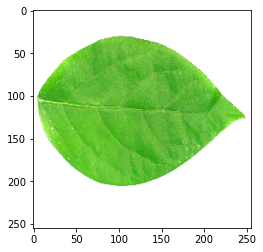

In [22]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import keras
model = keras.models.load_model('./resnet50_leafclassification.h5')
# run on one for valid dataset  image

datagen = ImageDataGenerator(  
    rescale = 1./255)

path = './leaves_dataset/new_leave_dataset/output/val/Chimonanthus praecox L./2127.jpg'
img = load_img(path, target_size=(255,255), color_mode='rgb')
img_array = img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

image =  datagen.flow(img_array)

predictions = model.predict(image)
# print(predictions[0])
score = predictions[0].reshape(-1,)
max_index_value = int(np.where(score == np.amax(score))[0])

print(plt.imshow(img))
print("The Given image of leaf is know by :",class_list[max_index_value])



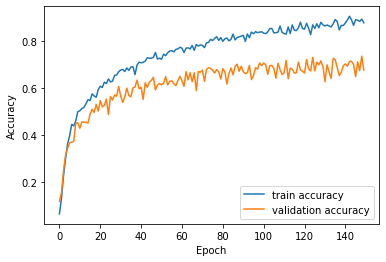

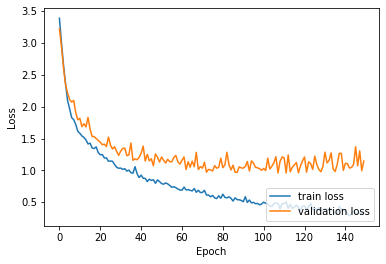

In [10]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()
